# K Nearest Neighbour

### Name: Mantas Macionis
### StudentID: C00242178

This is a notebook on K Nearest Neighbour classifiers, covering the process of building a kNN classifier from scratch and measuring its accuracy.
Originally created by github user RagsX137 and downloaded from: [github](https://github.com/RagsX137/TF_Tutorial/blob/master/My%2Bown%2BKNN%2BClassifier.ipynb)

The purpose of this editing this notebook is to get a better understanding of the models being used, how they function, and as a result, the scenarios, datatypes and parameter changes which they are most suited for.

[Link to K Nearest Neighbour Changelog](#k-nearest-neighbour-changelog)


## Overview of changes 
### Changes to K Nearest Neighbour Notebook
- Load sklearn Iris dataset, split into train/test. train KNN, retrieve metric scores
- Metrics are very high with many being 1.0, potentially due to iris dataset being too simple
- Load sklearn Wine Dataset, train KNN again, retrieve metrics. Observe more realistic metric scores
- Output confusion matrix for scores achieved
- Scale features, update hyperparameters(scaling, n_neighbours, distance metrics)
- Retrieve metrics for newly changed model, metrics have major improvements
- Output confusion matrix for new metrics
- Create PCA plot visualisation
- Create decision boundary visualisation



# Tutorial : Creating a Simple Nearest Neighbor Classifier from scratch

This is based on the K Nearest Neighbours Classifier which is a useful supervised machine learning classification algorithm. But really, we want to know what happens under the hood, i.e. when we call the KNNClassifier( ) from scikit learn, what really happens?

The scope of this tutorial is to build a simple Classifier from SCRATCH! 
But there are a few points to consider :
- To keep the time to a minimum, I will be building a classifier which identifies only ONE neighbor (this will be futher explained). 
- In the case of KNN, it uses a method of determining the distance between 'k' different points in space and using a voting method to classify, but in this case there is just 1 neighbor and hence I have eliminated the need for complexity by keeping the training algorithm very simple. 
- I will be using the IRIS dataset that's built into scikit learn. Since this dataset is already simplified and has only 4 dimensions (or variables), using the neighbors classifier will be easy. It will be much harder as the number of dimensions increase.
- I'll be importing a useful tool (Euclidean Distance : Google it!) from the Scipy (SCIentific PYthon library)

## 1. Importing the dataset from sklearn
The Iris Dataset is already loaded in sklearn and more details about iris can be found here (https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
X = iris.data
# Iris.data contains the features or independent variables.
y = iris.target
# Iris.target contains the labels or the dependent variables.

## 2. Doing a train-test split by using 50% of the data as our training set

The train-test-splitter found in the cross-valiation (now model selection module) of sklearn is a simple but powerful tool to randomly split the data into train and test datasets.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.50)

#### If you have used Machine Learning Classifiers in Python before, remember that there are usually 5 steps involved : 
- Select the model
- Train the model
- Fit the model
- Predict the outcome
- Check the accuracy

## 3. Calling the Euclidean Distance and creating a function to call it

This works similar to the Pythagorean Theorem but it can work in more than one dimension


In [5]:
from scipy.spatial import distance  # Built in function called distance.

                                    #Defining the n dimensional distance as euc.
def euc(a,b):                       # Lists of numeric features. 
    return distance.euclidean(a,b)  # Measure and return the distance between 2 points 
                                    # i.e. the training point and a test point.

## 4. The Real Deal : Building (Coding up) the classifier

The details are explained in comment form line-by-line in the following section.

In [6]:
# First we implement a class. Classes let you structure code in a specific way.(source --> https://learnpythonthehardway.org/book/ex40.html)

class OneNeighborClassifier():                # This 'class' has 2 Methods : Fit and Predict
    
    #Each step is followed by a comment which explains how the classifier is working 
    
    def fit(self, X_train, y_train):          # Takes features and labels as input
        self.X_train = X_train                # Storing the X_train in self.X_train
        self.y_train = y_train                # Storing the y_train in self.y_train
                                              # This is like the ML classifier will memorize the values 
        
    def predict (self, X_test):               # Receives features from the testing data and returns predictions
        predictions = []                      # List of predictions, since X_test is a 2D array or a list of lists.
        for row in X_test:                    # Each row contains the features for one testing example
            label = self.closest(row)         # We are calling the function that we are creating in the next block
                                              # to find the closest training point from the test point
            predictions.append(label)         # Add the labels to the predictions list to fill it.
        return predictions                    # Return predictions as the output
    
    def closest(self, row):                   # Create the function closest such that -->
        best_dist = euc(row, self.X_train[0]) # Measure the shortest distance a test point and the first train point
        best_index = 0                        # Keep track of the index of the train point that is closest
        for i in range (1, len(self.X_train)):# Iterate over the different training points
            dist = euc(row, self.X_train[i])
            if dist < best_dist:              # The moment we find a closer one, we update our variables.
                best_dist = dist              # If dist is shorter than best_dist, then its the new best_dist
                best_index = i                # Using the index of best_dist to return label of the closest training pt.
        return self.y_train[best_index]       # Return that label 
        
    

## 5. Final Steps
#### The classifier is built to utilize the standard pipeline that we use in scikit learn i.e. : 
- Call the classifier
- Fit the model to train it
- Predict the model on the test set 
- Check for accuracy between the real values and the predicted values

In [7]:
my_classifier = OneNeighborClassifier()
my_classifier.fit(X_train, y_train)

In [8]:
pred = my_classifier.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print ('Accuracy of the classifier is', accuracy_score(y_test, pred)*100, '%')

Accuracy of the classifier is 97.33333333333334 %


<a id="k-nearest-neighbour-changelog"></a>
# K Nearest Neighbour Changelog

## Using Iris Dataset for KNN
- split into training and test sets
- train the model
- output metrics

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predictions
predictions = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.9733333333333334
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.92      1.00      0.96        23
           2       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



- Multiple metrics are 1.0 or very close to it
- The iris dataset is too simple and has clear distinctions between classes, leading KNN to get very high metrics

## Using Wine dataset for KNN
- same process used as with iris dataset
- confusion matrix also output

Accuracy: 0.6404494382022472
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.61      0.65      0.63        34
           2       0.40      0.36      0.38        22

    accuracy                           0.64        89
   macro avg       0.61      0.61      0.61        89
weighted avg       0.64      0.64      0.64        89



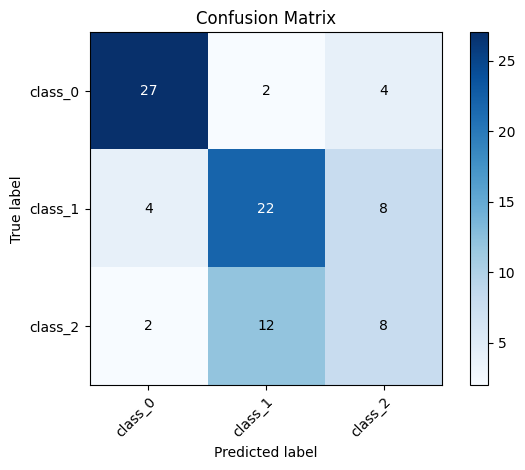

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predictions
predictions = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
labels = unique_labels(y_test, predictions)

# Plotting
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=wine.target_names[labels], yticklabels=wine.target_names[labels],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

plt.show()



- Metrics are achieved with the wine dataset are much lower, potential reaasons:
- KNN depends on choice of 'n_neighbours' value, to limit sentivity to noise in data, value chosen above is 3 which might not be ideal
- The default distance metric for KNN is euclidean distance, which might not suit the wine dataset

## Implementing parameter changes
- features scaled
- n_neighbours value changed to 5 (from 3)
- distance metric changed to "manhattan"
- new confusion matrix output

Accuracy: 0.9550561797752809
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.97      0.91      0.94        34
           2       1.00      1.00      1.00        22

    accuracy                           0.96        89
   macro avg       0.96      0.96      0.96        89
weighted avg       0.96      0.96      0.96        89



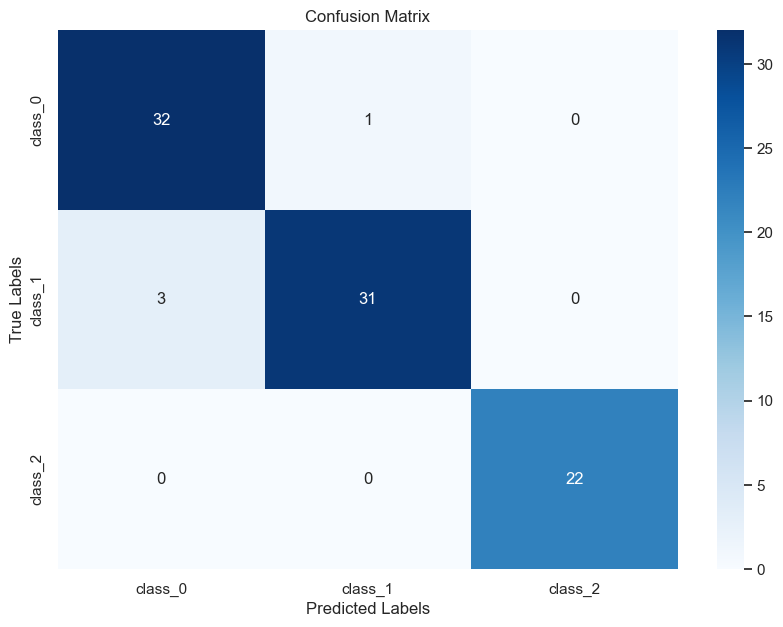

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# scale the features, as KNN is sensitive to the scale of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# Initialize the KNN classifier with updated hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')

# Train the model
knn.fit(X_train, y_train)

# Predictions
predictions = knn.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion matrix
cm = confusion_matrix(y_test, predictions)

#Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


- Major improvements in metrics
- Demonstrates importance of hyperparameter tuning  for KNN use

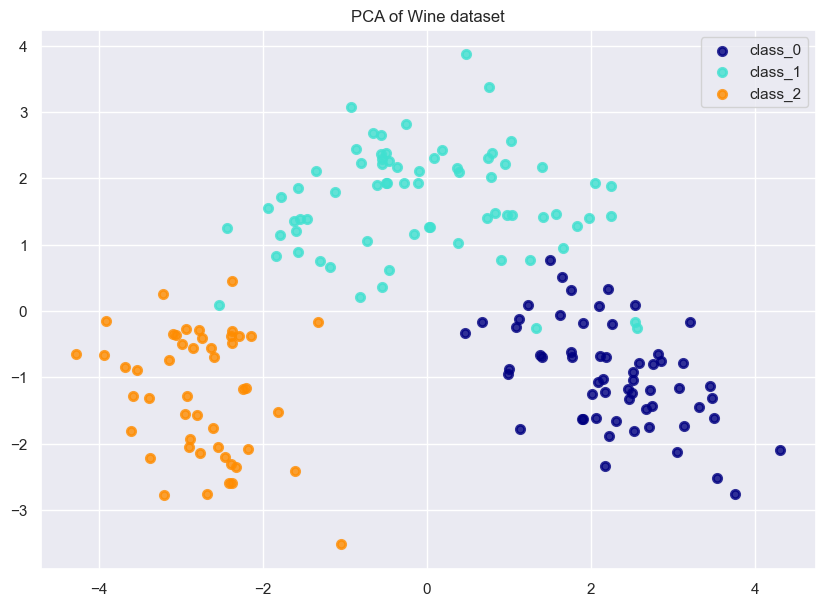

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Applying PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the PCA-reduced data
plt.figure(figsize=(10, 7))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
target_names = wine.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Wine dataset')
plt.show()


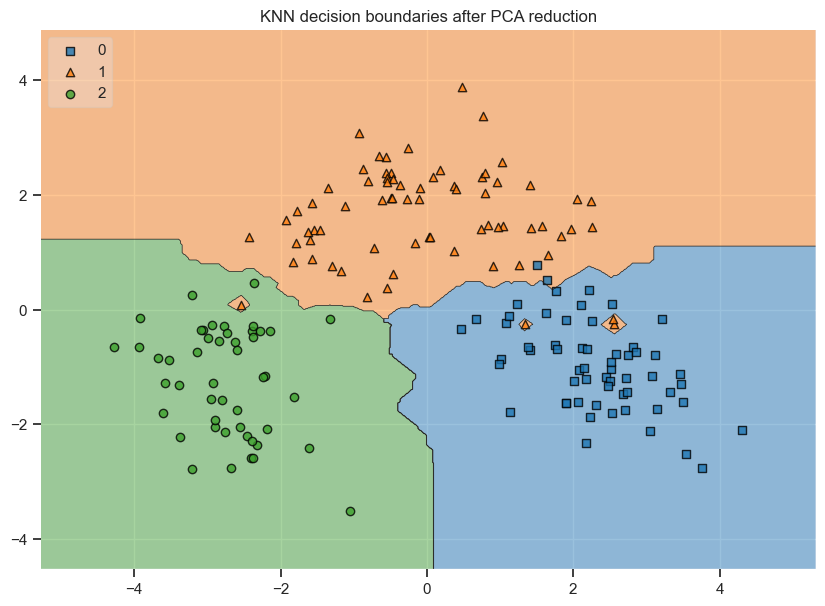

In [14]:
# Training a KNN model on the PCA-reduced data for visualization
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.5, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn_pca.fit(X_train_pca, y_train)

# Visualizing decision boundaries
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 7))
plot_decision_regions(X_pca, y, clf=knn_pca, legend=2)
plt.title('KNN decision boundaries after PCA reduction')
plt.show()
